Homework Assignment:
TL:DR Create a random data set of input patterns, generate the weights necessary to properly decode the inputs, show the code for their computation, and then demonstrate with at least one example that the network is robust to some noise.

More detailed:
1. Make the input patterns 2-d, square and of size "n".
2. Use a bipolar system and have, roughly, equal numbers of +1s and -1s in your patterns
3. Make a few of them and store them in some sort of data structure.
4. Using those patterns compute the weight matrix with the following equation:
$$ w_{ij} =\frac{1}{N} \sum_{\mu} value^\mu_i \times value^\mu_j$$
Where N is the size of the patters, that is how many "neurons". $\mu$ is an index for each of the patterns, and $i$ and $j$ refer to the neurons in the pattern $\mu$. Do this **in code**. The computer is good for this manual, repetitive sort of stuff.

5. Program an asynchronous updating rule, run your network until it stablelizes, and then show that you get back what you put in.
6. Then do the same for at least one disrupted pattern (where you flipped a couple of bits around.)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 

In [4]:
def patternSizeGenerator():
    N = random.randint(5, 21)
    SIZE = np.repeat(random.randint(3,6),2)
    return N, SIZE

N, SIZE = patternSizeGenerator()

In [5]:
def MakePatterns(ps, psize):
    patterns = []
    for n in range(ps):
        tobepatt = np.random.normal(0, 1, size = psize)
        for i in range(len(tobepatt)):
            for j in range(len(tobepatt)):
                if tobepatt[i][j] <= 0:
                    tobepatt[i][j] = -1
                elif tobepatt[i][j] > 0:
                    tobepatt[i][j] = 1
        patterns.append(tobepatt)
    return patterns

In [6]:
def MakeWeights(patterns):
    w = np.zeros(list(map((lambda x: x**2),patterns[0].shape)))
    for p in patterns:
        w = (1.0/p.size)*(w + np.outer(p,p))
    np.fill_diagonal(w,0)
    return w

In [7]:
def hopfieldLoop(inPattern,weights):
    while True:
        rows = list(range(inPattern.shape[0]))
        columns = list(range(inPattern.shape[1]))
        random.shuffle(rows)
        random.shuffle(columns)
        testpatt = inPattern
        for i in rows:
            for j in columns:
                inPattern[i][j] = 1.0 if ((np.reshape(inPattern,(1,inPattern.size))
                                        @ weights[i]) * inPattern[i][j]) > 0 else -1
        if (np.all(testpatt == inPattern)): break
    return(inPattern)

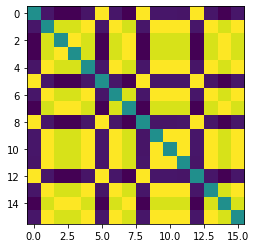

In [8]:
N, SIZE = patternSizeGenerator()
patterns = MakePatterns(N, SIZE)
w = MakeWeights(patterns)
plt.imshow(w)


In [9]:
def hopPlot(ins,outs): 
    r = len(ins)
    c = 3
    pltcntr = 1
    for i in range(r):
        plt.subplot(r,3,pltcntr)
        plt.imshow(ins[i])
        plt.subplot(r,3,(pltcntr+1))
        plt.imshow(outs[i])
        plt.subplot(r,3,(pltcntr+2))
        plt.imshow(ins[i]-outs[i])
        pltcntr = pltcntr+3
    return(plt)

In [10]:
myn,mysz = patternSizeGenerator()
myps = MakePatterns(myn,mysz)
w = MakeWeights(myps)
outps = []
for inp in myps:
    op = hopfieldLoop(inp,w)
    outps.append(op)

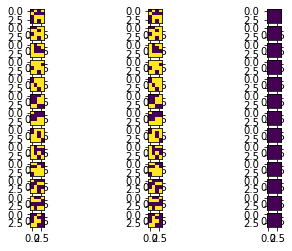

In [11]:
myp = hopPlot(myps,outps)